<a href="https://colab.research.google.com/github/ppiont/tensor-flow-state/blob/master/visualizing_dataset_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visualizing imputed dataset (imputed by crude backfilling)


In [1]:
from google.colab import drive
drive.mount("/gdrive", force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
%cd "/gdrive/My Drive/tensor-flow-state/tensor-flow-state"

/gdrive/My Drive/tensor-flow-state/tensor-flow-state


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("data/df_NAs_row_meaned.csv", index_col = 0, parse_dates = True)

In [0]:
cols = ["speed", "flow", "speed_-2", "speed_-1","speed_+1", "speed_+2", "flow_-2", "flow_-1", "flow_+1", "flow_+2", "speed_limit"]
speed_cols = ["speed", "speed_-2", "speed_-1","speed_+1", "speed_+2"]
flow_cols = ["flow", "flow_-2", "flow_-1", "flow_+1", "flow_+2"]

In [0]:
def resample_df(df, freq = "D", method_speed = np.mean, method_flow = np.sum):
    copied = df.resample(freq).agg({
           "speed": method_speed, "speed_-2": method_speed, "speed_-1": method_speed, "speed_+1": method_speed, "speed_+2": method_speed,
           "flow": method_flow, "flow_-2": method_flow, "flow_-1": method_flow, "flow_+1": method_flow, "flow_+2": method_flow})
    return copied

In [0]:
df_D = resample_df(df, method_speed = np.mean)
df_W = resample_df(df, freq = "W", method_speed = np.mean)

Visualize unimputed df

In [0]:
df_raw = pd.read_csv("data/combined_df.csv", index_col = 0, parse_dates = True)

In [0]:
df_raw.head()

,speed,flow,speed_-2,speed_-1,speed_+1,speed_+2,flow_-2,flow_-1,flow_+1,flow_+2,speed_limit
2011-01-03 00:00:00,120.000000,8.0,100.000000,120.000000,118.5,120.000000,8.0,6.0,4.0,6.0,120.0
2011-01-03 00:01:00,120.000000,5.0,115.000000,120.000000,118.0,104.000000,18.0,6.0,5.0,2.0,120.0
2011-01-03 00:02:00,111.000000,2.0,112.666667,104.000000,91.0,112.666667,14.0,2.0,4.0,8.0,120.0
2011-01-03 00:03:00,105.333333,10.0,118.000000,108.666667,120.0,120.000000,14.0,6.0,9.0,10.0,120.0
2011-01-03 00:04:00,120.000000,8.0,105.500000,120.000000,120.0,117.500000,21.0,13.0,7.0,5.0,120.0


In [0]:
raw = df_raw[["speed", "flow", "speed_limit"]].copy()
raw["not_null"] = np.where(((raw.speed.notnull()) | (raw.flow.notnull())), 1, np.nan)
rawres = raw.resample("W").agg({"speed": np.mean, "flow": np.sum, "speed_limit": np.median, "not_null": np.sum})

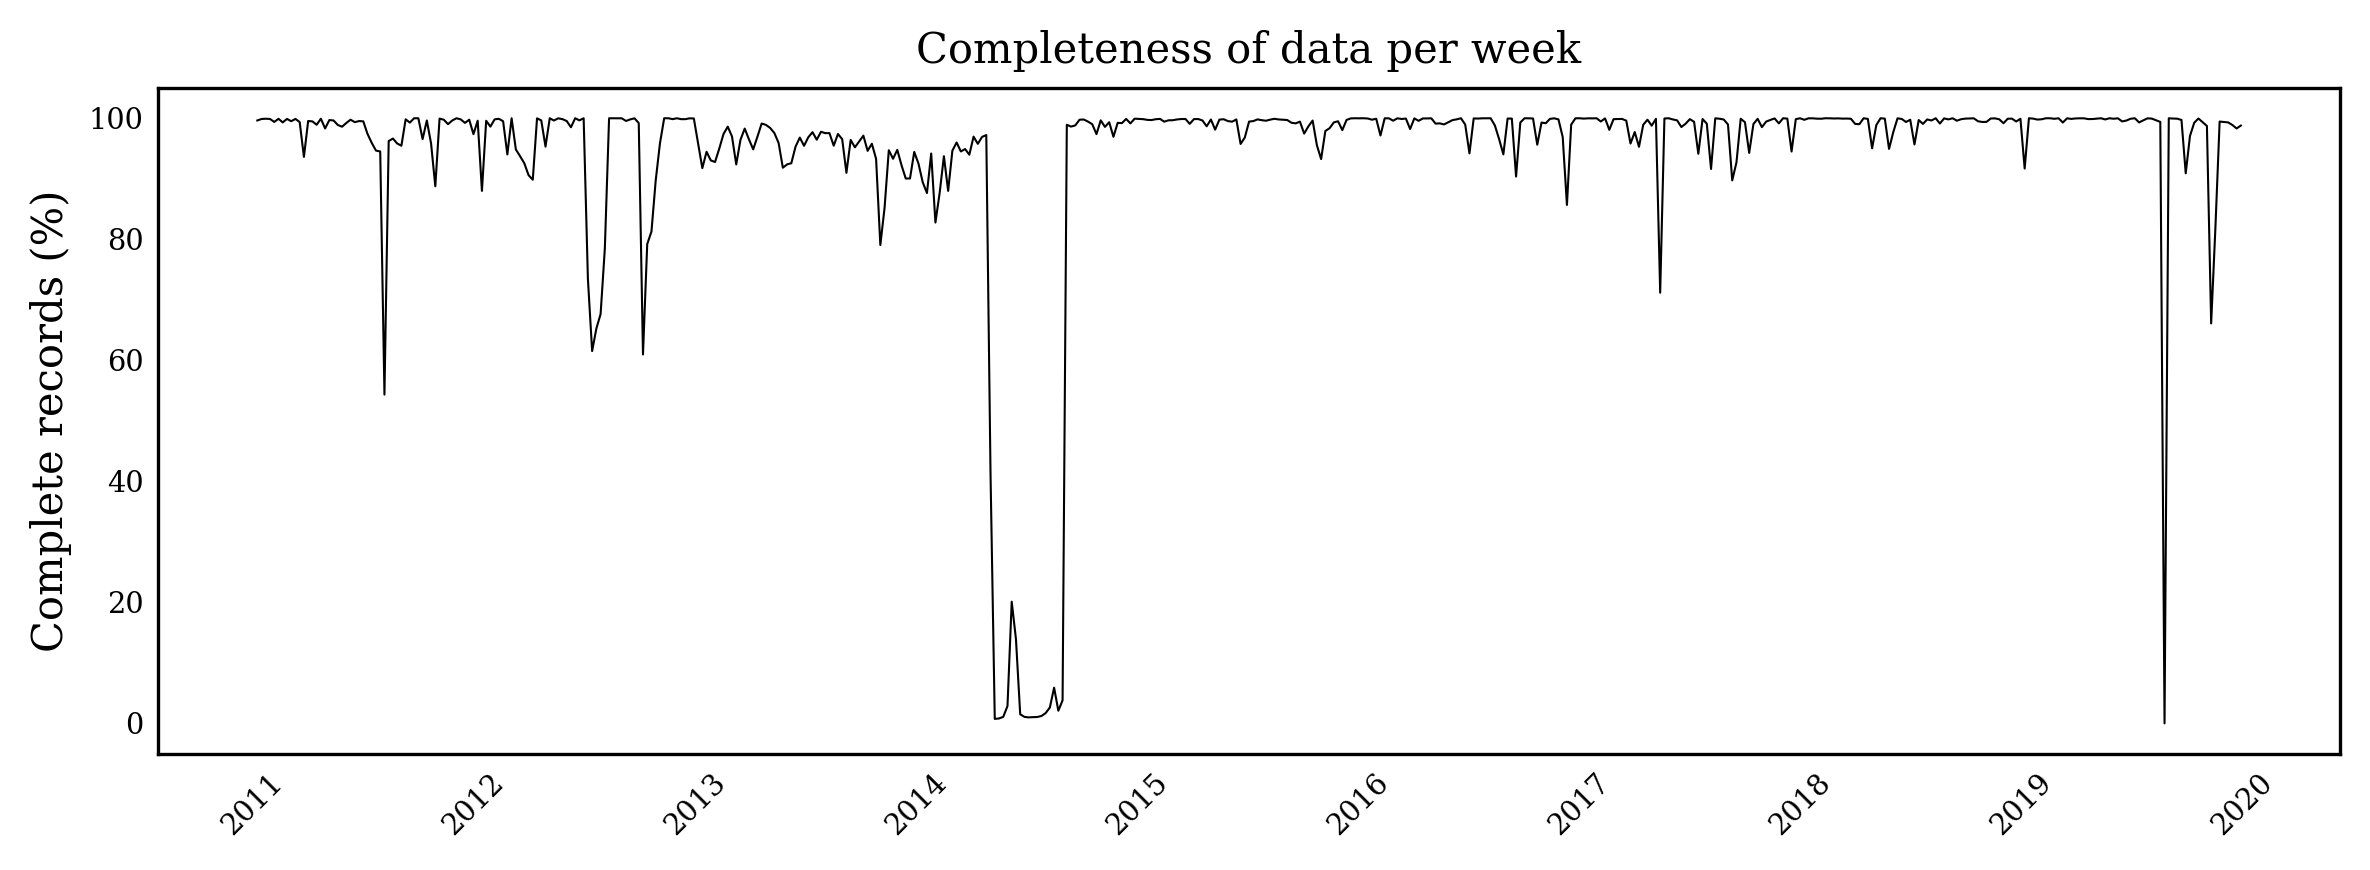

In [22]:
x, y1, y2 = rawres.index, rawres.not_null / 10080 * 100, rawres.speed

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rcParams["figure.dpi"] = 300
fig, ax1 = plt.subplots(figsize = (8, 3))
ax1.set_title("Completeness of data per week")
ax1.plot(x, y1, "k-", label = "Complete records", lw = 0.5)
ax1.set_ylabel("Complete records (%)")#, color="b")
ax1.tick_params(axis='both', which='both', length=0)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
# for tick in ax1.get_yticklabels():
#     tick.set_color("b")
# create second ax in same fig, sharing x-axis with ax1
# ax2 = ax1.twinx()
# ax2.plot(x, y2, "r-", label = "Mean speed")
# ax2.set_ylabel("Kph", color="r")
# for tl in ax2.get_yticklabels():
#     tl.set_color("r")
h1, l1 = ax1.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# sns.despine()
plt.tight_layout()
fig.savefig("plots/Data_completeness.pdf")

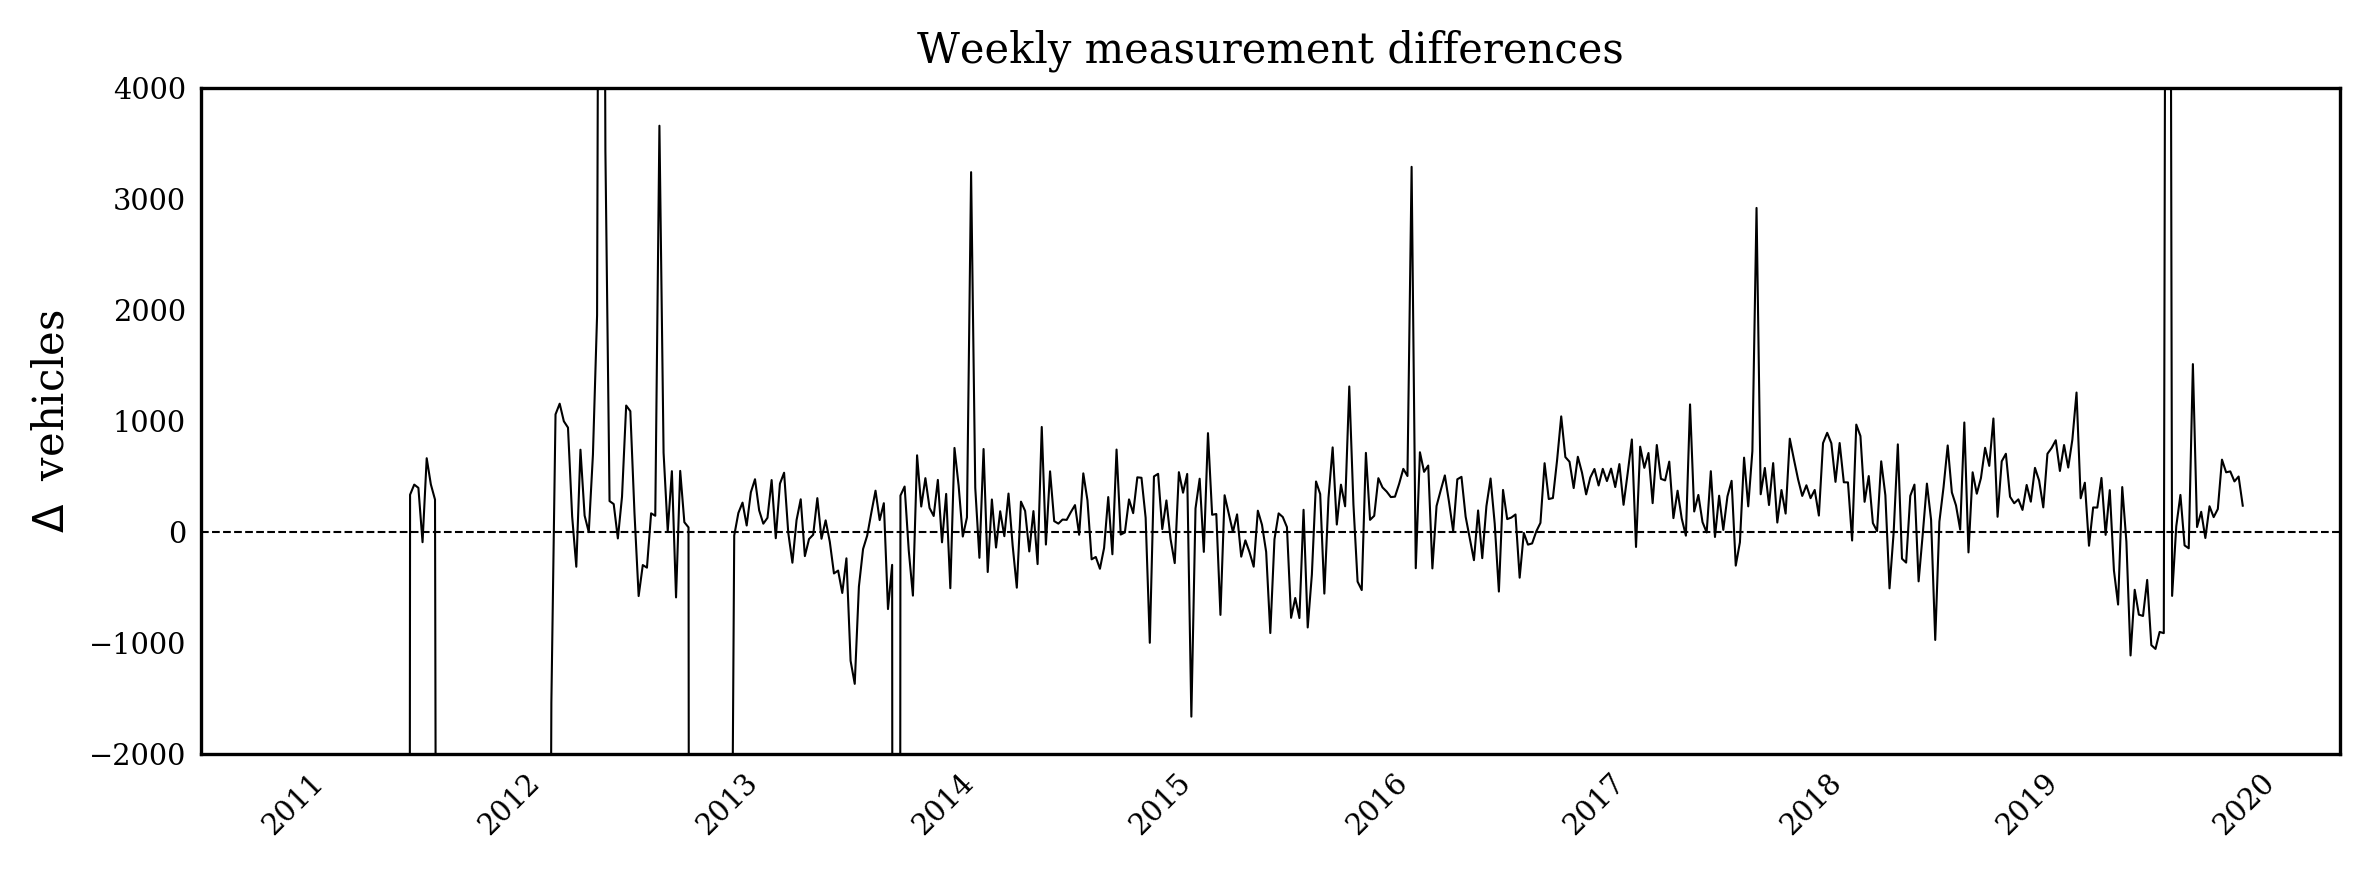

In [26]:
# define x, y1, y2 plot data
temp = df_raw[["flow", "flow_-1"]].resample("W").sum()
# temp = temp[temp.index >= "2016"]
x, y1 = temp.index, temp["flow_-1"] - temp["flow"]

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rc('axes', titlesize='medium')
plt.rcParams["figure.dpi"] = 300

# create figure, ax
fig, ax1 = plt.subplots(figsize = (8, 3))
# set title
ax1.set_title("Weekly measurement differences")
# plot
ax1.plot(x, y1, 'k-', lw = 0.5)
ax1.set_ylim(-2000, 4000)
ax1.tick_params(axis='both', which='both', length=0)
ax1.set_ylabel("$\Delta\;$ vehicles")
ax1.axhline(y=0, color='k', lw=0.5, alpha=1, zorder=0, ls='--')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
plt.tight_layout()
fig.savefig("plots/Measurement_discrepancy.pdf")

In [0]:
# weekly_diff = temp["flow_-1"] - temp["flow"]
# averager = weekly_diff / ((temp["flow_-1"].sum() + temp["flow"].sum())/2)


# temp2 = df_raw[["flow", "flow_-1"]].resample("D").sum()
# daily_diff = temp2["flow_-1"] - temp2["flow"]
# averager2 = daily_diff / ((temp2["flow_-1"] + temp2["flow"]/2))
# print(averager.mean(), averager2.mean())

-5.6691388268500043e-05 -0.04341893282384201


(3283, 2)

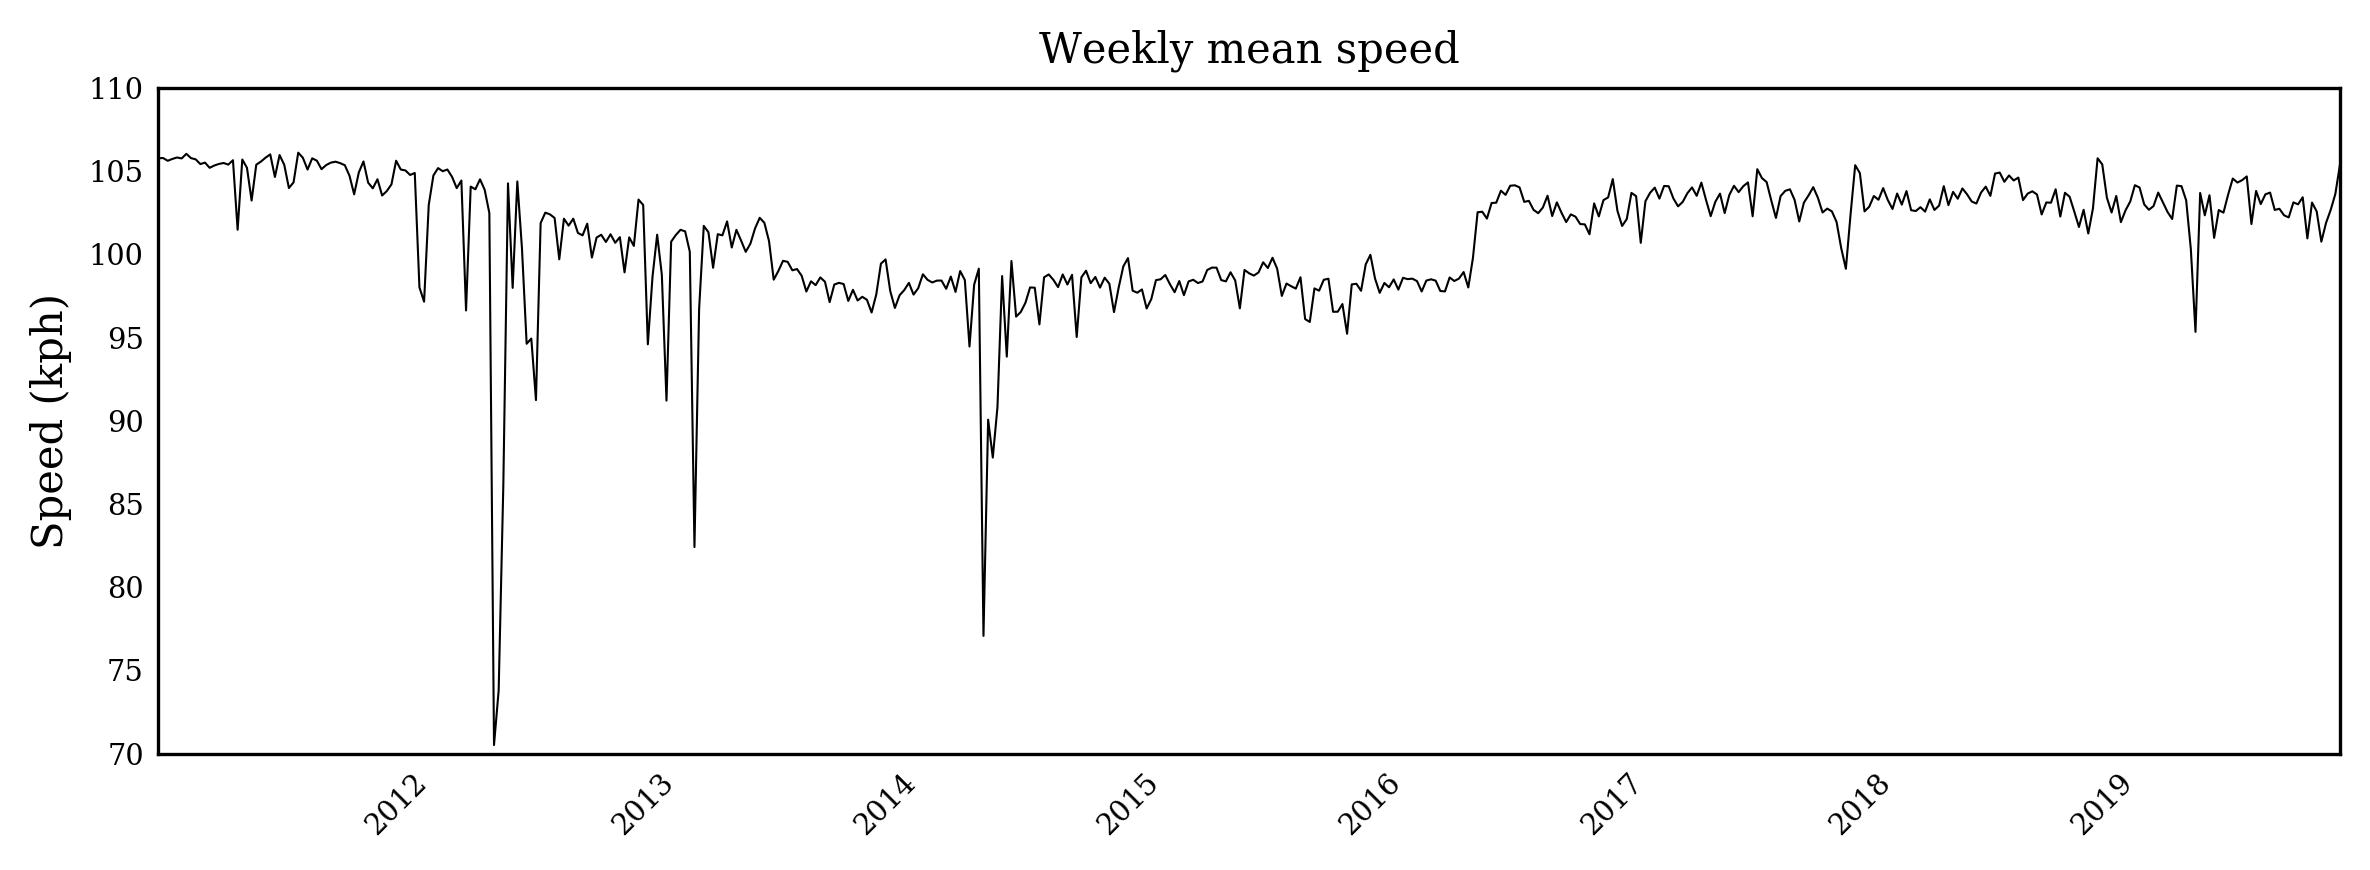

In [24]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rcParams["figure.dpi"] = 300

fig, ax = plt.subplots(figsize = (8, 3))
ax.set_title("Weekly mean speed")
ax.set_ylabel("Speed (kph)")
ax.set_ylim(70, 110)
df_W["speed"].plot(ax = ax, lw = 0.5, color="k")
ax.tick_params(axis='both', which='both', length=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.tight_layout()
fig.savefig("plots/Weekly_mean_speed.pdf")

In [0]:
fig.savefig("plots/Daily_speed_mean.png", dpi = 600)

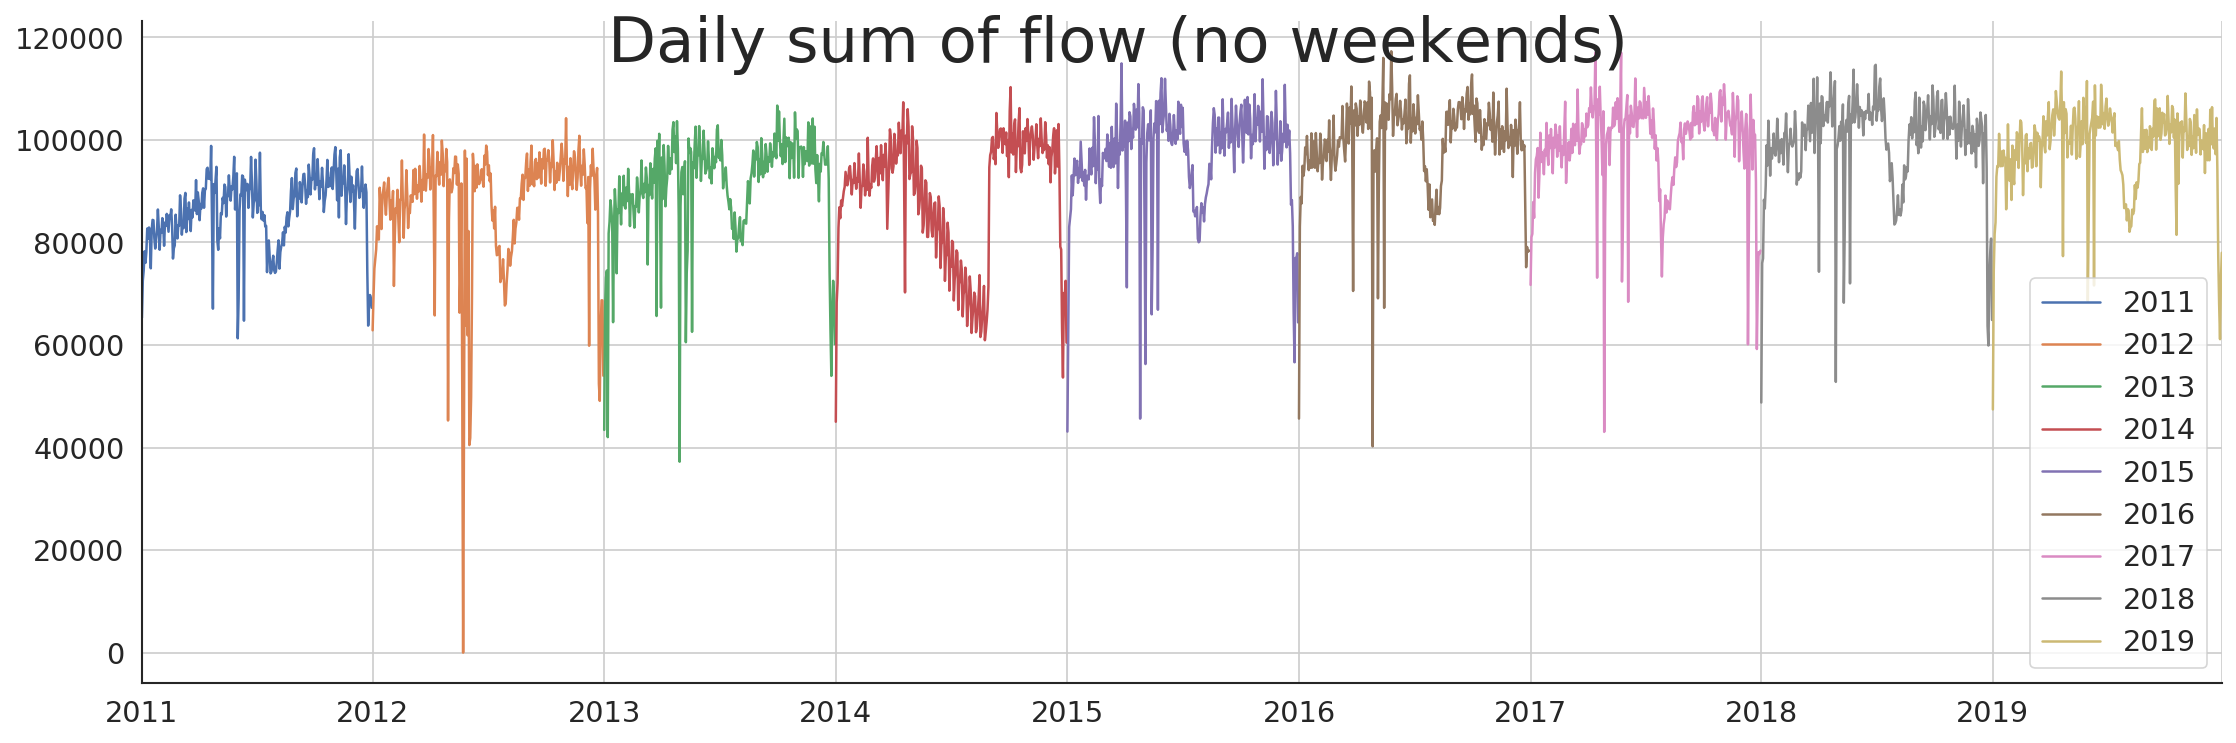

In [0]:
fig, ax = plt.subplots(figsize = (15, 5),sharey = True) 
fig.suptitle("Daily sum of flow (no weekends)", fontsize = 30)

for i, year in enumerate(range(2011, 2020)):
    df_D[(df_D.index.year == year) & (df_D.index.dayofweek != 5) & (df_D.index.dayofweek != 6)]["flow"].plot(ax = ax, label = year)
plt.grid(True)
ax.legend()
sns.despine()
plt.tight_layout()

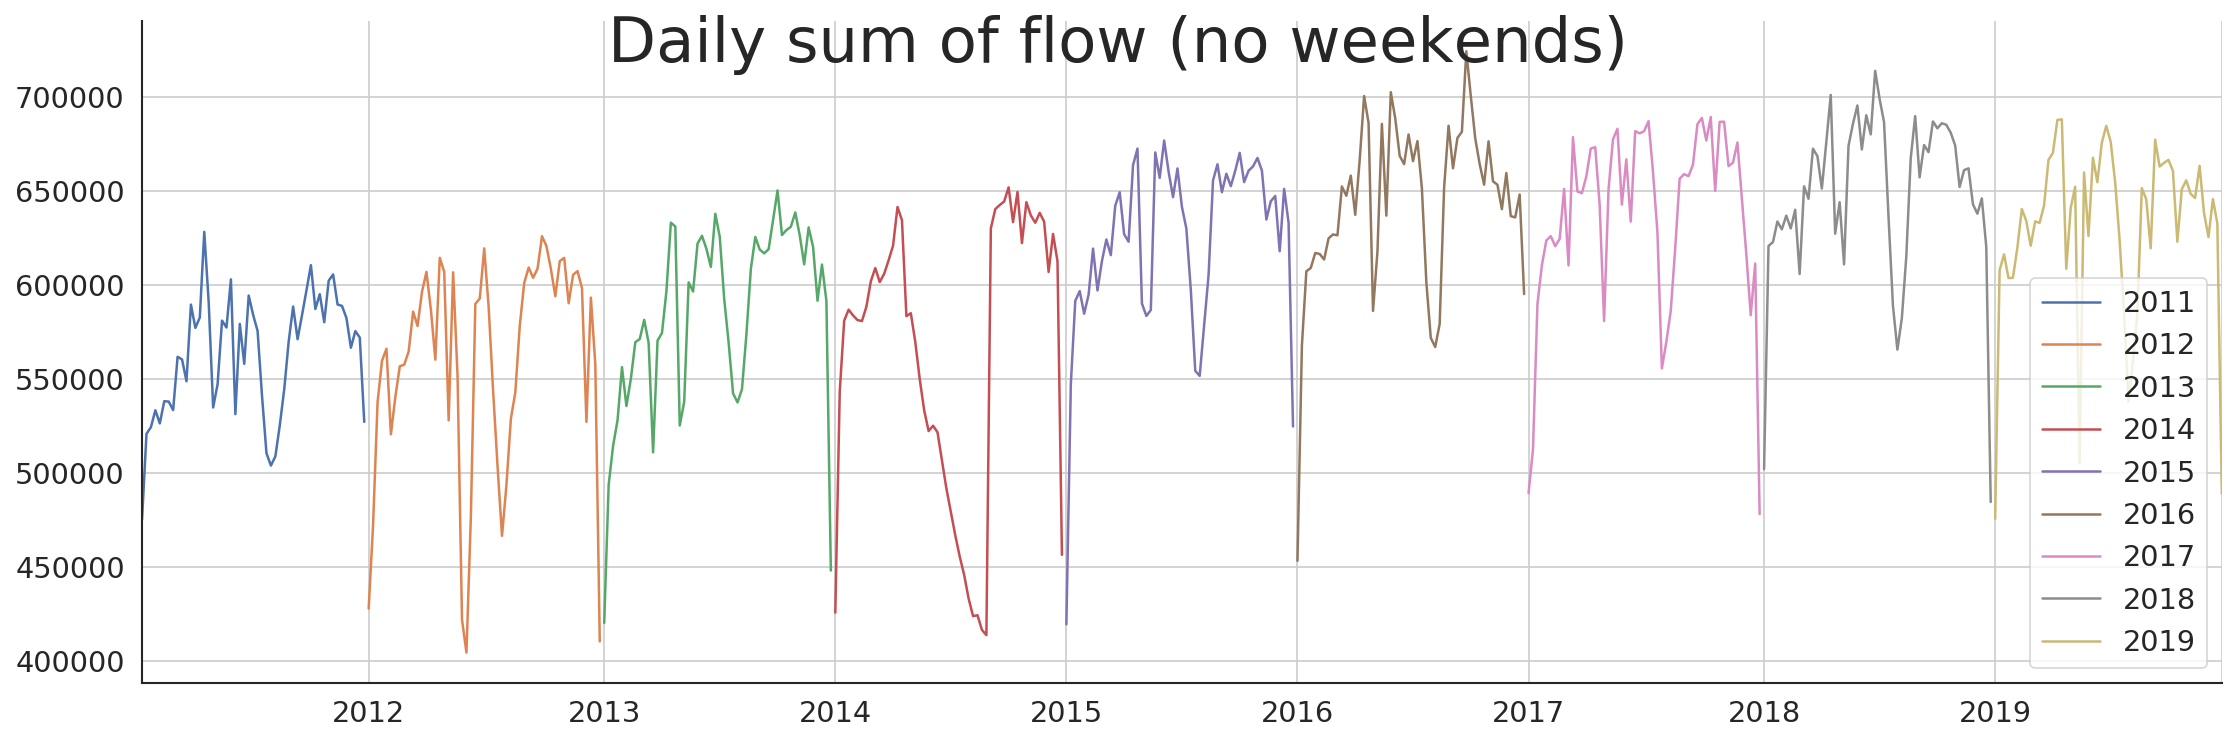

In [0]:
fig, ax = plt.subplots(figsize = (15, 5), sharey = True)
fig.suptitle("Daily sum of flow (no weekends)", fontsize = 30)

for i, year in enumerate(range(2011, 2020)):
    df_W[(df_W.index.year == year)]["flow"].plot(ax = ax, label = year)
plt.grid(True)
ax.legend()
sns.despine()
plt.tight_layout()

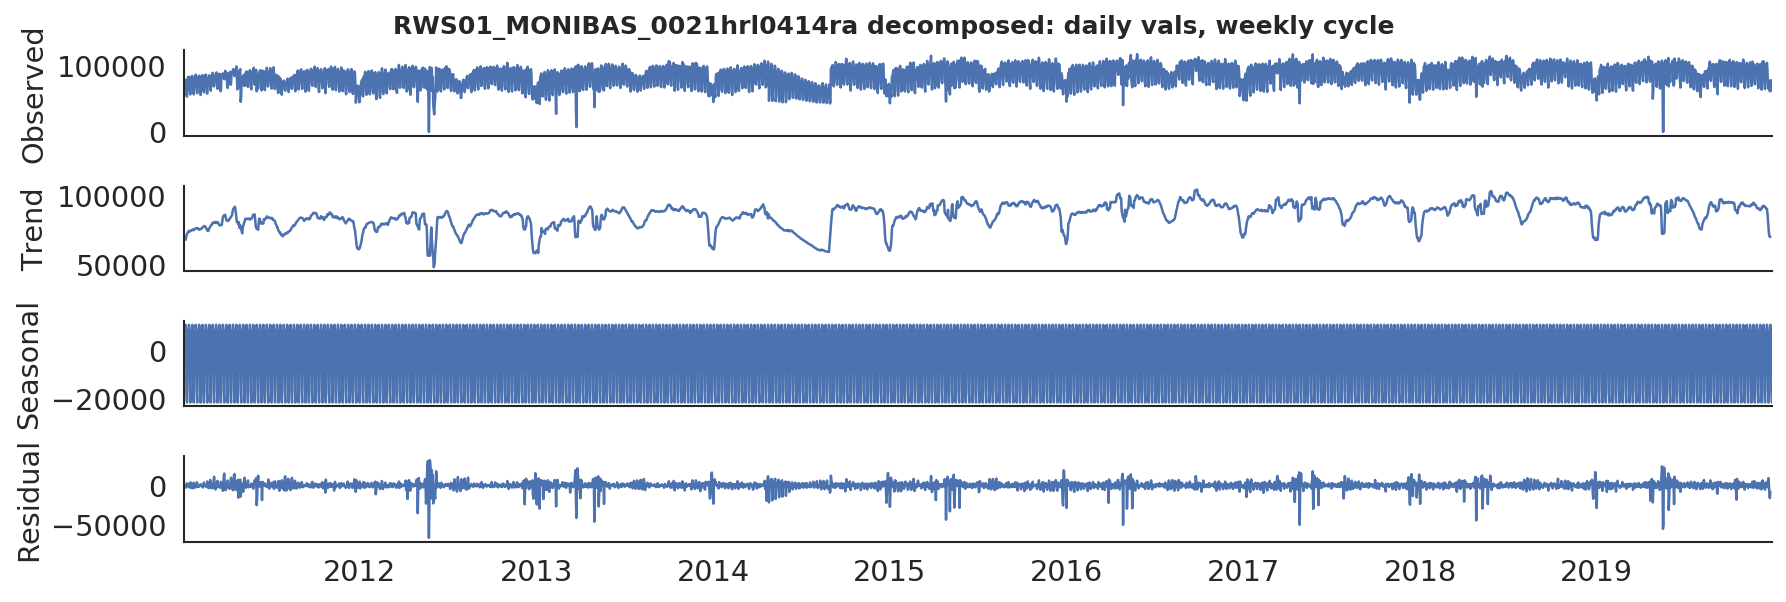

In [0]:
# Plot seasonal decomposition
import statsmodels.tsa.api as smt

y = df_D.flow

decomp = smt.seasonal_decompose(y, model = "additive", freq = 7)
fig =  plt.figure(figsize = (12, 4))
fig.suptitle(f"RWS01_MONIBAS_0021hrl0414ra decomposed: daily vals, weekly cycle", fontsize = 12, fontweight = "bold", y = 0.990)
layout = (4, 1)
observed_ax = plt.subplot2grid(layout, (0, 0)); trend_ax = plt.subplot2grid(layout, (1, 0)); seasonal_ax = plt.subplot2grid(layout, (2, 0)); residual_ax = plt.subplot2grid(layout, (3, 0))
observed_ax.set_ylabel("Observed"); trend_ax.set_ylabel("Trend"); seasonal_ax.set_ylabel("Seasonal"); residual_ax.set_ylabel("Residual")
observed_ax.get_shared_x_axes().join(observed_ax, trend_ax, seasonal_ax, residual_ax)

decomp.observed.plot(ax = observed_ax)
decomp.trend.plot(ax = trend_ax)
decomp.seasonal.plot(ax = seasonal_ax)
decomp.resid.plot(ax = residual_ax)
sns.despine()
plt.tight_layout()
plt.show()

In [0]:
import statsmodels.tsa.api as smt
def correlation_plot(y, title, lags=None, figsize=(16, 9)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=12, fontweight="bold")
    y.plot(ax=hist_ax, kind="hist", bins=120)
    hist_ax.set_title("Histogram")
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    sns.despine()
    plt.tight_layout()
    plt.show()
    return fig, ts_ax, acf_ax, pacf_ax

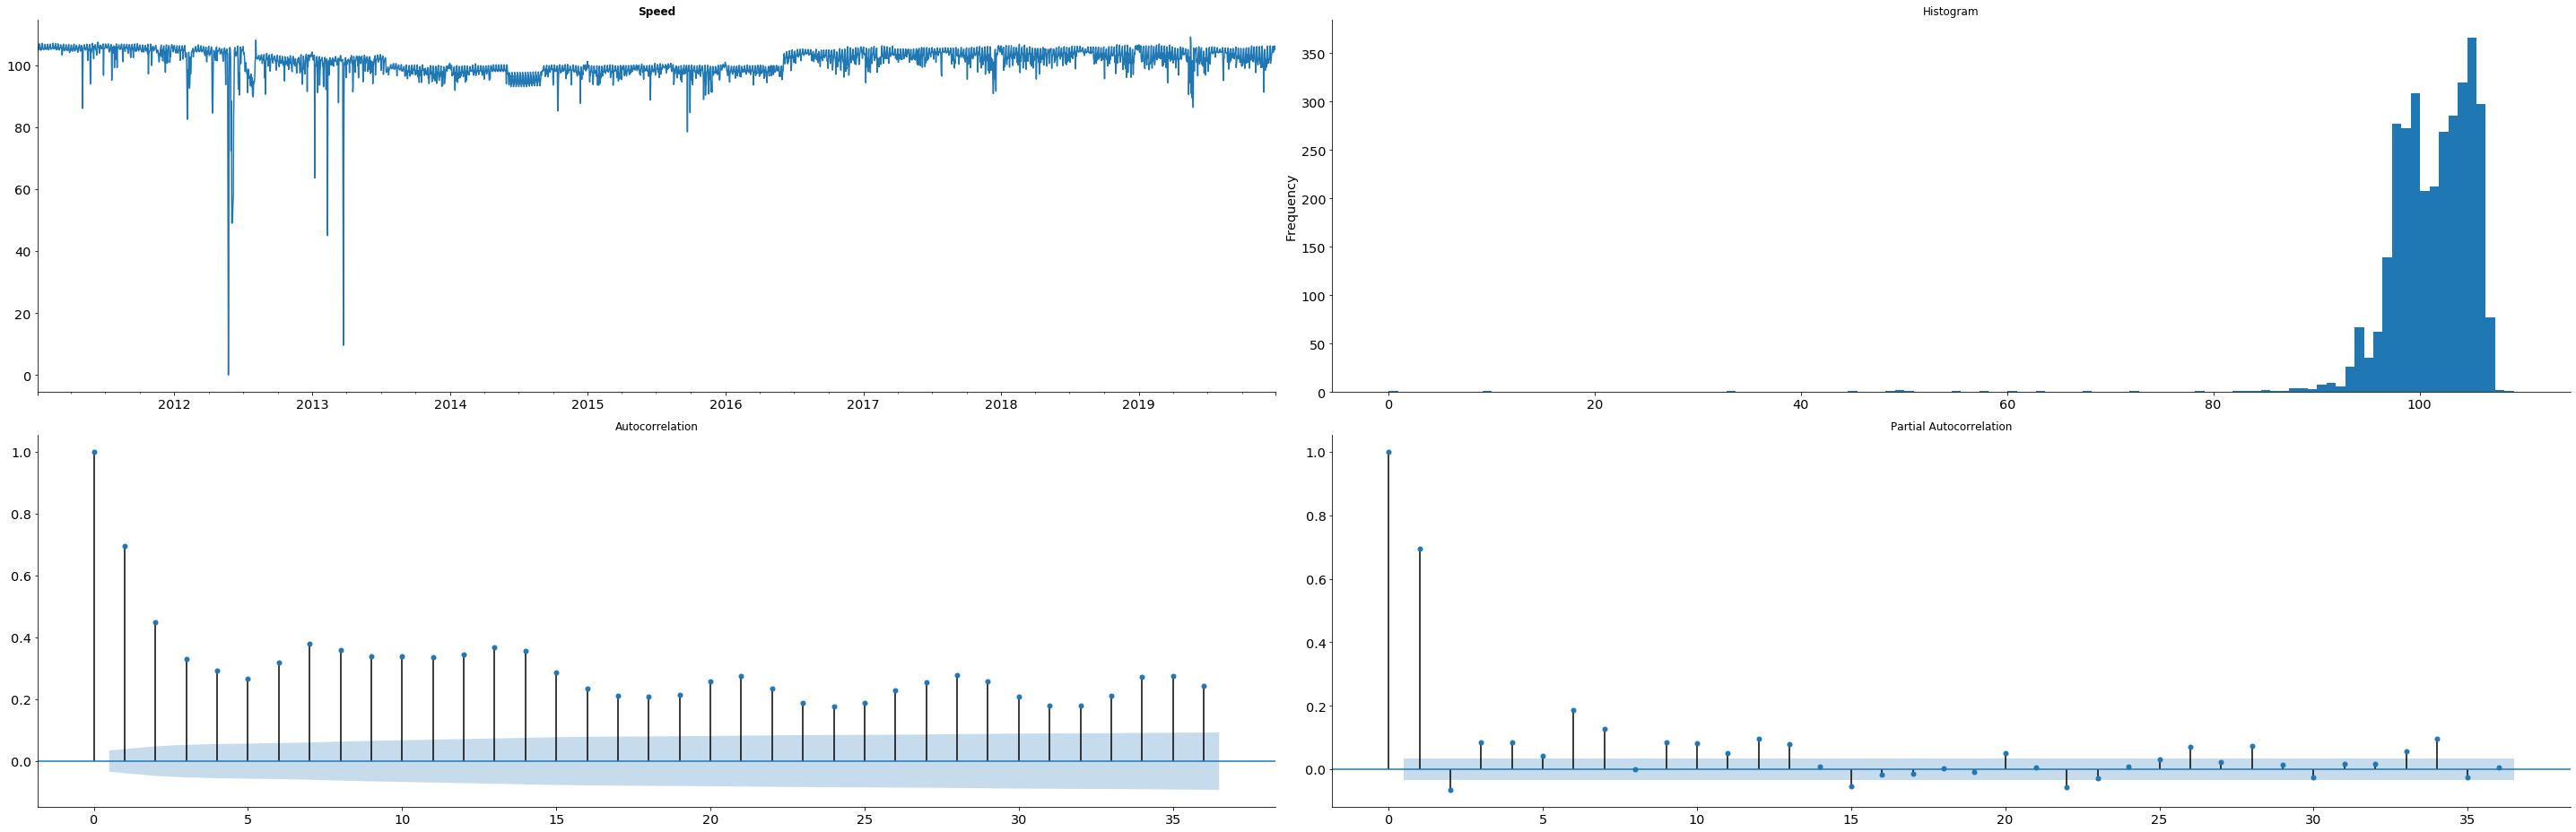

In [0]:
fig = correlation_plot(df_D.speed, "Speed", figsize = (40,13))[0]
plt.show()